In [1]:
import numpy
import pylab
import SterileSearchPy as ssp

In [2]:
import matplotlib
%matplotlib inline
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
matplotlib.rc('font', **font)

In [3]:
dp=ssp.DataPaths()

steer=ssp.SteeringParams()
nus=ssp.SterileNuParams()

dp.squids_files_path="/data/user/bjones/Sterilizer/Sterilizer/conventional_fluxes/"
dp.prompt_squids_files_path="/data/user/bjones/Sterilizer/Sterilizer/prompt_fluxes/"

steer.ReadCompact=False
steer.logEbinEdge=numpy.log10(400)
steer.logEbinWidth=0.17

In [4]:
guy=ssp.Sterilizer(dp,steer,nus)

In [5]:
# This is the default set of nuisance params
DefaultNuisance = ssp.Nuisance()

# And here is another set, but we modified the pi/k ratio by 20%
ModifiedNuisance = ssp.Nuisance()
ModifiedNuisance.piKRatio=1.2

In [6]:
# This is how you get the bin edges in the loaded data and MC
# histograms
EbinsData = numpy.array(guy.GetEnergyBinsData())
EbinsMC   = numpy.array(guy.GetEnergyBinsMC())
ZbinsData = numpy.array(guy.GetZenithBinsData())
ZbinsMC   = numpy.array(guy.GetZenithBinsMC())

# And the bin centers
EbinCentersData = numpy.array(EbinsData[1:]+EbinsData[:-1])/2.
EbinCentersMC   = numpy.array(EbinsMC[1:]+EbinsMC[:-1])/2.
ZbinCentersData = numpy.array(ZbinsData[1:]+ZbinsData[:-1])/2.
ZbinCentersMC   = numpy.array(ZbinsMC[1:]+ZbinsMC[:-1])/2.

# For example
print(EbinsData)



[   400.00008128    591.64347792    875.1048346    1294.37490672
   1914.52078984   2831.78377124   4188.51514676   6195.26791306
   9163.47277488  13553.76950188  20000.        ]


In [7]:
#This is how to get the data distribution
data=guy.GetDataDistribution()[0]

#This is how to get the expectation of the MC, with given
#  sets of nuisance parameters
expecDefault = guy.GetExpectation(DefaultNuisance)[0]
expecModPiK  = guy.GetExpectation(ModifiedNuisance)[0]

#This will give you one random realization of the MC:
randomseed   = 1
realization  = guy.GetRealization(DefaultNuisance,randomseed)[0]

/cvmfs/icecube.opensciencegrid.org/py2-v3_early_access/RHEL_6_x86_64/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: RuntimeWarning: divide by zero encountered in log10
/cvmfs/icecube.opensciencegrid.org/py2-v3_early_access/RHEL_6_x86_64/lib/python2.7/site-packages/matplotlib/font_manager.py:1282: UserWarning: findfont: Font family [u'normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


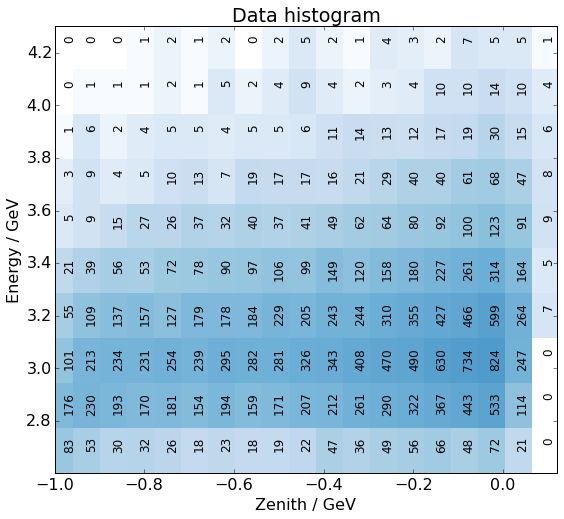

In [8]:
#Make the data histogram:

pylab.figure(figsize=(9,8))
ev,cv=numpy.meshgrid(numpy.log10(EbinCentersData),ZbinCentersData)
ev_flat=ev.flatten()
cv_flat=cv.flatten()
data_flat=data.flatten()
pylab.hist2d(cv_flat,ev_flat,weights=numpy.log10(data_flat), bins=(ZbinsData,numpy.log10(EbinsData)),cmap=pylab.get_cmap('Blues'))
for i in range(0,len(data_flat)):
    if(not numpy.isnan(data_flat[i]) and not numpy.isinf(data_flat[i])):
        pylab.annotate("{:.0f}".format(data_flat[i]),xy=(cv_flat[i],ev_flat[i]),size=12,color='black',rotation='vertical')
pylab.clim(0,5)
pylab.xlabel("Zenith / GeV")
pylab.ylabel("Energy / GeV")
pylab.title("Data histogram")
pylab.show()

/cvmfs/icecube.opensciencegrid.org/py2-v3_early_access/RHEL_6_x86_64/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: RuntimeWarning: divide by zero encountered in log10


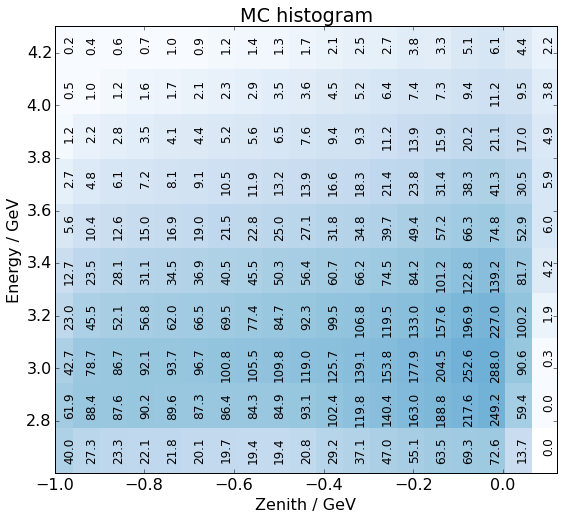

In [9]:
#Make the MC histogram:

pylab.figure(figsize=(9,8))
ev,cv=numpy.meshgrid(numpy.log10(EbinCentersMC),ZbinCentersMC)
ev_flat=ev.flatten()
cv_flat=cv.flatten()
expec_flat=expecDefault.flatten()
pylab.hist2d(cv_flat,ev_flat,weights=numpy.log10(expec_flat), bins=(ZbinsMC,numpy.log10(EbinsMC)),cmap=pylab.get_cmap('Blues'))
for i in range(0,len(expec_flat)):
    if(not numpy.isnan(expec_flat[i]) and not numpy.isinf(expec_flat[i])):
        pylab.annotate("{:.1f}".format(expec_flat[i]),xy=(cv_flat[i],ev_flat[i]),size=12,color='black',rotation='vertical')
pylab.clim(0,5)
pylab.xlabel("Zenith / GeV")
pylab.ylabel("Energy / GeV")
pylab.title("MC histogram")
pylab.show()

/cvmfs/icecube.opensciencegrid.org/py2-v3_early_access/RHEL_6_x86_64/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: RuntimeWarning: invalid value encountered in divide
  from IPython.kernel.zmq import kernelapp as app


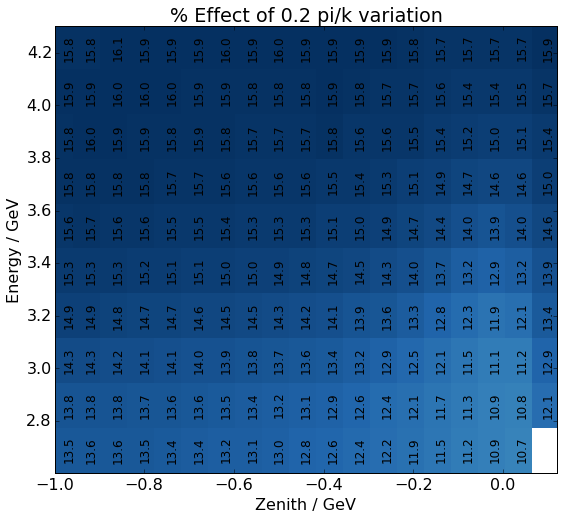

In [10]:
#Compare two nuisance parameter expectations
ratio=(expecModPiK/expecDefault-1.)*100

pylab.figure(figsize=(9,8))
ev,cv=numpy.meshgrid(numpy.log10(EbinCentersMC),ZbinCentersMC)
ev_flat=ev.flatten()
cv_flat=cv.flatten()
ratio_flat=ratio.flatten()
pylab.hist2d(cv_flat,ev_flat,weights=ratio_flat, bins=(ZbinsMC,numpy.log10(EbinsMC)),cmap=pylab.get_cmap('RdBu'))
for i in range(0,len(ratio_flat)):
    if(not numpy.isnan(ratio_flat[i]) and not numpy.isinf(ratio_flat[i])):
        pylab.annotate("{:.1f}".format(ratio_flat[i]),xy=(cv_flat[i],ev_flat[i]),size=12,color='black',rotation='vertical')
pylab.clim(-16,16)
pylab.xlabel("Zenith / GeV")
pylab.ylabel("Energy / GeV")
pylab.title("% Effect of 0.2 pi/k variation")
pylab.show()

In [12]:
# OK. What about if we want the actual event list, not just the histogram? Easy - do this:
DataList=guy.SpitData()

# it has entries that look like this:
print("Length", len(Data))
e1=Data[1]
print("Energy: ", e1.Energy,",  Zenith: ",e1.Zenith,",  Year: ", e1.Year, "  Weight: ", e1.Weight)

TypeError: No to_python (by-value) converter found for C++ type: SterileSearch::ExternEvent

In [ ]:
# Similarly for a realization or for the expectation
randomseed=1
RealizationList=guy.SpitRealization(DefaultNuisance,1)

#ExpectationList=guy.SpitExpectation(DefaultNuisance)